In [606]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error , make_scorer, mean_absolute_error
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [607]:
dataset = pd.read_csv('audi.csv')

dataset

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


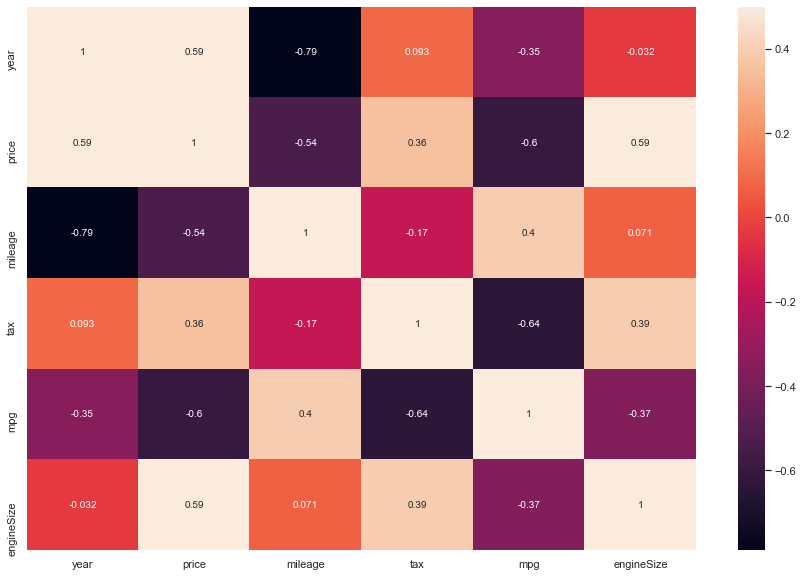

In [608]:
#on check les correlations
cormat = dataset.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cormat, vmax=.5, annot=True);
# on remarque de que mpg a la meilleur corellation avec price 

<AxesSubplot:>

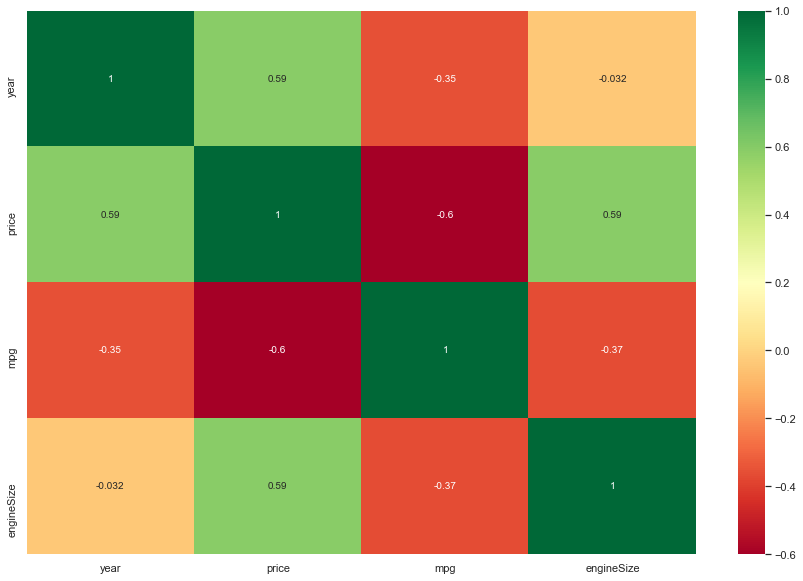

In [609]:
#on affiche les colonnes avec les meilleurs corelation donc au dessus de 0.55
cormat = dataset.corr()
meilleurCor = cormat.index[abs(cormat["price"])>0.55]
plt.figure(figsize=(15,10))
sns.heatmap(dataset[meilleurCor].corr(),annot=True,cmap="RdYlGn")

<AxesSubplot:xlabel='mpg', ylabel='price'>

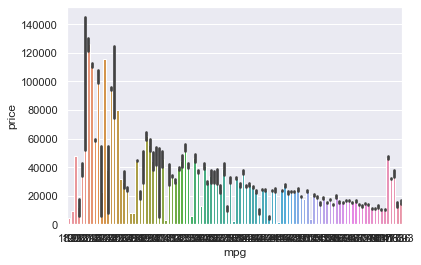

In [610]:
sns.barplot(dataset.mpg,dataset.price)
# on vois bien que mpg représente bien le prix car plus il est a gauche plus le prix est élevé et plus il est a droite plus le prix est bas

In [611]:
dataset.price = np.log1p(dataset.price )
y = dataset.price

In [612]:
x = dataset[['year', 'mileage', 'mpg', 'engineSize']] 
y = dataset[['price']]

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=123413246)

In [613]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((7467, 4), (3201, 4), (7467, 1), (3201, 1))

In [614]:
X_train.head(3)

,year,mileage,mpg,engineSize
3979,2019,6000,44.8,1.5
7789,2016,27519,70.6,1.6
4500,2018,13894,50.4,1.4


In [615]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
test_pre = lr.predict(X_test)
train_pre = lr.predict(X_train)

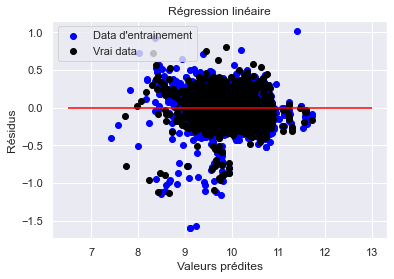

In [616]:
#tracé entre les valeurs prédites et les résidus
plt.scatter(train_pre, train_pre - Y_train, c = "blue",  label = "Data d'entrainement")
plt.scatter(test_pre,test_pre - Y_test, c = "black",  label = "Vrai data")
plt.title("Régression linéaire")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 6.5, xmax = 13, color = "red")
plt.show()

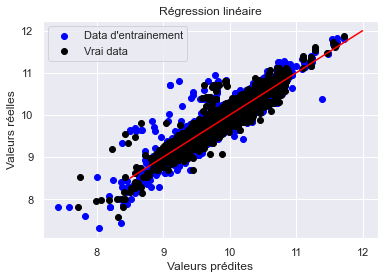

In [617]:
#Prédictions du tracé - Valeurs réelles
plt.scatter(train_pre, Y_train, c = "blue",  label = "Data d'entrainement")
plt.scatter(test_pre, Y_test, c = "black",  label = "Vrai data")
plt.title("Régression linéaire")
plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")
plt.legend(loc = "upper left")
plt.plot([8.5, 12], [8.5, 12], c = "red")
plt.show()

In [618]:
# calcul de la précision en utilisant l'erreur aboslue qui va nous nous permetre de trouver l'eurreur relative 
# 1 - erreur relative = Précision
def accuracy(y_test,y_pred):
    result = 0
    for i in range(len(y_test)):
        error = abs(y_test[i] - y_pred[i])# Erreur aboslue
        relerror = error / y_test[i]# l'erreur relative 
        result += relerror
   
    result = result / len(y_test)
    result = 1 - result
    return result

        
    

In [619]:
print('Erreur absolue moyenne :',mean_absolute_error(Y_test, test_pre))

print('Nous avons une précision de' , accuracy(Y_test.to_numpy()[0],test_pre[0]) * 100 ,'%')

Erreur absolue moyenne : 0.12193757037496415
Nous avons une précision de 99.32885829925257 %
